In [2]:
# load Model and Test
loaded = np.load("utils\\dataset.npz")
x = loaded['x']
y = loaded['y']

In [3]:
dataset_path = "E:\Project\Data Science\Face Emotion Recognition\dataset"
dir_path = glob.glob(dataset_path + "\*")

Suprise


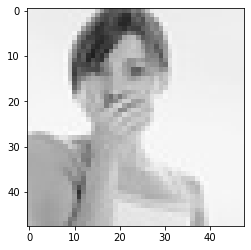

In [4]:
# Extraction Label
string_label = []
string_number = []
for string in dir_path:
    string_label.append(string.split("\\")[5])

plt.imshow(x[27000])
print(string_label[y[27000]])

In [21]:
string_label

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

In [5]:
# Lets do the cross validation
from sklearn.model_selection import StratifiedKFold as skf

skf_model = skf(n_splits=6, random_state=21, shuffle=True)
for train_idx, test_idx in skf_model.split(x, y):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [6]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(28273,)
(23561,)
(4712,)


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6, dtype='int16')
y_test = to_categorical(y_test, num_classes=6, dtype='int16')

In [10]:
import tensorflow as tf

def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(48, 48, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', kernel_initializer="he_uniform", bias_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer="he_uniform", bias_regularizer=tf.keras.regularizers.L2(0.01)),
        
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        
        #tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        #tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        
        tf.keras.layers.Dense(16, activation="relu"),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation="softmax")
    ])

In [13]:
model = create_model()

opt = tf.keras.optimizers.Adam(learning_rate=0.0005, momentum=0.8)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 16)        448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dense_2 (Dense)              (None, 22, 22, 16)        528       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [14]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=8,
    validation_steps=8,
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 2.9854 - accuracy: 0.2146 - val_loss: 5.8657 - val_accuracy: 0.1490
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 1.8338 - accuracy: 0.2670 - val_loss: 2.8008 - val_accuracy: 0.2640
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 1.6261 - accuracy: 0.3508 - val_loss: 2.0649 - val_accuracy: 0.3336
Epoch 4/50
8/8 [==============================] - 18s 2s/step - loss: 1.5393 - accuracy: 0.3980 - val_loss: 2.0122 - val_accuracy: 0.3179
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 1.4653 - accuracy: 0.4316 - val_loss: 2.1720 - val_accuracy: 0.2685
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 1.3984 - accuracy: 0.4599 - val_loss: 1.6918 - val_accuracy: 0.3589
Epoch 7/50
8/8 [==============================] - 16s 2s/step - loss: 1.3403 - accuracy: 0.4836 - val_loss: 1.8235 - val_accuracy: 0.3657
Epoch 8/50
8/8 [==================

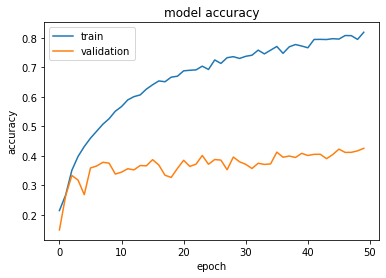

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

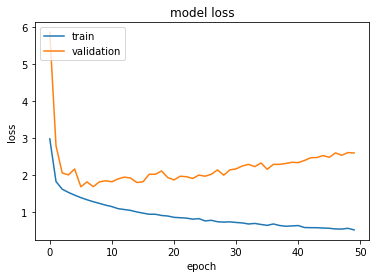

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Akurasi : {} %".format(str(score[1] * 100)))

148/148 - 1s - loss: 2.6051 - accuracy: 0.4255
Akurasi : 42.55093336105347 %


In [77]:
from tensorflow.keras.models import model_from_json

# Save Model
model_json = model.to_json()
with open("utils//model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("utils//weight.h5")